In [10]:
import pandas as pd
import re
import urllib
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [11]:
data = pd.read_csv('TestData.csv')

In [12]:
data.dropna(subset=['text'], inplace=True)
#data.dropna(subset=['emotion'], inplace=True)
data=data[data.index%2==0]

In [13]:
data["text"]=data.text.str.replace(r'^b','') 
data["text"]=data.text.str.replace(r'https?:\/\/.*\/[a-zA-Z0-9]*', '') 
data["text"]=data.text.str.replace(r'@[a-zA-Z0-9]{1,10}', '') 
data["text"]=data.text.str.replace(r'\$[a-zA-Z0-9]*', '')
data["text"]=data.text.str.replace(r'[0-9]*','')
data["text"]=data.text.str.replace(r'\\[a-z A-Z]{1,2}','')
data["text"]=data.text.str.replace(r'\:','')
data["text"]=data.text.str.replace(r'\\n','')
data["text"]=data.text.str.replace(r'\#','')
data["text"]=data.text.str.replace(r'\/','')
data["text"]=data.text.str.replace(r'\'','')
data["text"]=data.text.str.replace(r'\"','')
data["text"]=data.text.str.replace(r'\-','')
data["text"]=data.text.str.replace(r'\?','')
data["text"]=data.text.str.replace(r'\_','')
data["text"]=data.text.str.replace(r'%','')
data["text"]=data.text.str.replace(r'\,','')
data["text"]=data.text.str.replace(r'.','')
data["text"]=data.text.str.replace(r'\&amp','')
data["text"]=data.text.str.replace(r';','')
data["text"]=data.text.str.replace(r'!','')
data["text"]=data.text.str.replace(r'\\s','')
data["text"]=data.text.str.replace(r'\)','')
data["text"]=data.text.str.replace(r'\(','')
data["text"]=data.text.str.replace(r'\+','')
data["text"]=data.text.str.replace(r'\=','')

In [14]:
vectorizer = TfidfVectorizer(min_df=2,max_df=0.9,lowercase="True",stop_words="english")

In [15]:
X = vectorizer.fit_transform(data.text.values.astype('U'))
y=data.emotion
data['X']=list(X)
data['y']=data.emotion

In [16]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X[0:875], y[0:875])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [17]:
result=[] 
result=clf.predict(X[0:6966])
val=np.arange(0,13931,2)
series=pd.Series(result,index=val)
#print(series)

In [18]:
data["NaiveBayes"]=series

In [19]:
from sklearn.metrics import accuracy_score
data.head()
data.index
accuracy_score(series[0:875],y[0:875])

0.85485714285714287

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(series[876:1077],y[876:1077])
#print(series[877:1077])

0.54726368159203975

In [21]:
from sklearn import svm
clf_svm = svm.SVC(kernel="linear", verbose=3)
clf_svm.fit(X[0:875], y[0:875])

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=3)

In [22]:
res=[]
res=clf_svm.predict(X[0:6966])
lis=np.arange(0,13931,2)
ser=pd.Series(res,index=lis)
#print(ser)
data['SVM']=ser

In [23]:
accuracy_score(ser[0:875],y[0:875])

0.93028571428571427

In [24]:
accuracy_score(ser[876:1077],y[876:1077])

0.52736318407960203

In [25]:
data.to_csv('Result.csv')

In [26]:
%matplotlib inline

In [27]:
import matplotlib.pyplot as plt

Counter({'positive': 463, 'neutral': 358, 'negative': 54})
Counter({'positive': 542, 'neutral': 333})


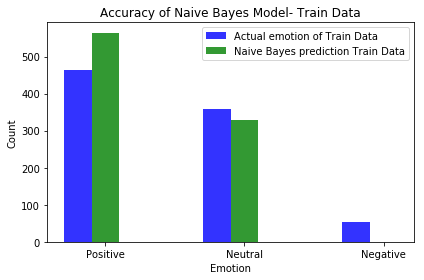

In [28]:
from collections import Counter
c=Counter(y[:875])
s=Counter(series[:875])
print(c)
print(s)
n_groups=3
yemo=(463,358,54)
NBemo=(564,329,0)
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8
rects1 = plt.bar(index, yemo, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Actual emotion of Train Data')
rects2 = plt.bar(index + bar_width, NBemo, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Naive Bayes prediction Train Data')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(index + bar_width, ('Positive', 'Neutral', 'Negative'))
plt.legend()
plt.title('Accuracy of Naive Bayes Model- Train Data')
plt.tight_layout()
plt.show()

Counter({'positive': 150, 'negative': 27, 'neutral': 24})
Counter({'positive': 151, 'neutral': 50})


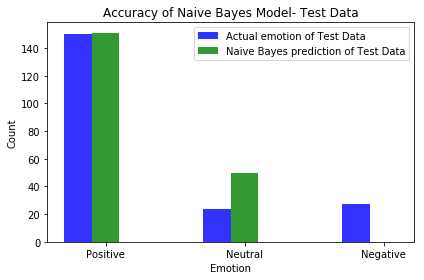

In [29]:
from collections import Counter
ct=Counter(y[877:1078])
st=Counter(series[876:1077])
print(ct)
print(st)
n_groups=3
ytestemo=(150,24,27)
NBtestemo=(151,50,0)
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8
rects1 = plt.bar(index, ytestemo, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Actual emotion of Test Data')
rects2 = plt.bar(index + bar_width, NBtestemo,bar_width,
                 alpha=opacity,
                 color='g',
                 label='Naive Bayes prediction of Test Data')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(index + bar_width, ('Positive', 'Neutral', 'Negative'))
plt.legend()
plt.title('Accuracy of Naive Bayes Model- Test Data')
plt.tight_layout()
plt.show()

Counter({'positive': 463, 'neutral': 358, 'negative': 54})
Counter({'positive': 462, 'neutral': 377, 'negative': 36})


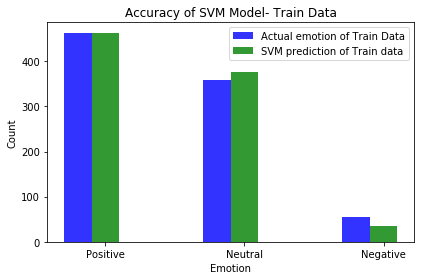

In [30]:
from collections import Counter
cs=Counter(y[:875])
ss=Counter(ser[:875])
print(cs)
print(ss)
n_groups=3
yemo=(463,358,54)
SVMemo=(462,377,36)
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8
rects1 = plt.bar(index, yemo, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Actual emotion of Train Data')
rects2 = plt.bar(index + bar_width, SVMemo,bar_width,
                 alpha=opacity,
                 color='g',
                 label='SVM prediction of Train data')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(index + bar_width, ('Positive', 'Neutral', 'Negative'))
plt.legend()
plt.title('Accuracy of SVM Model- Train Data')
plt.tight_layout()
plt.show()

Counter({'positive': 150, 'negative': 28, 'neutral': 24})
Counter({'positive': 141, 'neutral': 60})


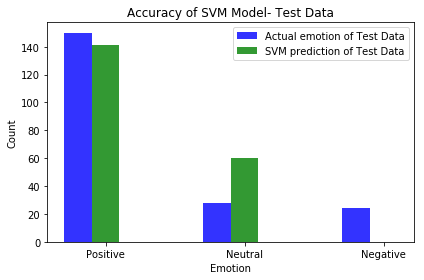

In [31]:
from collections import Counter
ct=Counter(y[876:1078])
st=Counter(ser[876:1077])
print(ct)
print(st)
n_groups=3
ytestemo=(150,28,24)
SVMtestemo=(141,60,0)
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8
rects1 = plt.bar(index, ytestemo, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Actual emotion of Test Data')
rects2 = plt.bar(index + bar_width, SVMtestemo,bar_width,
                 alpha=opacity,
                 color='g',
                 label='SVM prediction of Test Data')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(index + bar_width, ('Positive', 'Neutral', 'Negative'))
plt.legend()
plt.title('Accuracy of SVM Model- Test Data')
plt.tight_layout()
plt.show()

In [32]:
val=(data.loc[data['emotion'] == 'negative'])

In [33]:
v=(data.loc[data['SVM'] == 'negative'])

In [34]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
wordfreq={}
for tweet in val["text"]:
    word_tokens = word_tokenize(tweet)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            if(w not in wordfreq):
                wordfreq[w]=0
            wordfreq[w]+=1
#print(wordfreq)

In [35]:
from operator import itemgetter
sorted(wordfreq.items(), key=itemgetter(1))

[('Incredibly', 1),
 ('Bad', 1),
 ('Idea', 1),
 ('Tesla', 1),
 ('completely', 1),
 ('missed', 1),
 ('goal', 1),
 ('production', 1),
 ('September', 1),
 ('fety', 1),
 ('htt', 1),
 ('Data', 1),
 ('collection', 1),
 ('security', 1),
 ('flaws', 1),
 ('carmakers', 1),
 ('autonomousdriving', 1),
 ('Coverage', 1),
 ('SelfDrivingCarsho', 1),
 ('responsible', 1),
 ('crashes', 1),
 ('Insurance', 1),
 ('companies', 1),
 ('sure', 1),
 ('yet', 1),
 ('HarleyDavidson', 1),
 ('Is', 1),
 ('In', 1),
 ('Trouble', 1),
 ('understand', 1),
 ('accidents', 1),
 ('State', 1),
 ('Of', 1),
 ('York', 1),
 ('Didnt', 1),
 ('Consult', 1),
 ('With', 1),
 ('shared', 1),
 ('robotaxis', 1),
 ('disrupt', 1),
 ('sharedmobility', 1),
 ('market', 1),
 ('robotics', 1),
 ('report', 1),
 ('says', 1),
 ('long', 1),
 ('roll', 1),
 ('lead', 1),
 ('thousands', 1),
 ('preventable', 1),
 ('highway', 1),
 ('deaths', 1),
 ('TO', 1),
 ('SAVE', 1),
 ('THE', 1),
 ('MOST', 1),
 ('LIVES', 1),
 ('DEPLOY', 1),
 ('IMPERFECT', 1),
 ('SELFDRIVI